# ***Predicting Customer Churn with CART (Decision Trees)***

**By Sean Kim**

*Welcome, marketers and aspiring data scientists! Now that you have an understanding of CART models, you'll be tackling a common business challenge: **customer churn**. We will predict which customers might leave (“churn”) a telecom service, using a Classification and Regression Tree (CART) model. We'll explain each step in detail, invite you to try things out for yourself, and relate the results to real-world marketing actions*

---

## ***Introduction:***

Let's role-play: You're a marketer at Telco, a popular telecom provider. Recently, you've noticed a worrying trend—customers leaving your service. In the telecom world, we call this customer churn—basically, when customers decide to pack up and move on. Losing customers isn't just frustrating; it's costly. In fact, studies show it's much cheaper to keep existing customers happy than to find new ones. Unfortunately, churn rates in the telecom industry are notoriously high—often around 20-30% per year([MDPI.COM](https://www.mdpi.com/1999-4893/17/6/231#:~:text=Prediction%20of%20Customer%20Churn%20Behavior,major%20industry%20at%20over%2030))​.

**Your mission should you choose to accept:** *Find out why customers are leaving and create an action plan to keep them around*

**Why CART (Decision trees)?**

To solve the churn puzzle, we're using a tool called CART Decision Trees. Decision trees are popular because they're easy to understand—even if you're not a tech wizard—and they're great at handling messy, real-world data.

Think of a decision tree like playing a game of “20 questions” about your customers. Each question splits customers into different groups based on their answers:

- "Is their contract month-to-month?"
- "Do they use a lot of tech support?"
"Are they high-billing customers?"
At the end, you'll have clear "rules" that predict who's likely to churn. For example:
- “IF a customer has a month-to-month contract AND uses tech support heavily, THEN they're likely to churn.”

Pretty simple, right? This makes it easy for you and your team to take action.

**Learning Outcomes:**

Expect to walk away with practical skills that you can use immediattely in marketing. You'll learn:

1. Dataset Loading and Overview
2. Data Cleaning and Preprocessing
3. Building a CART (Decision Tree)
4. Visualizing and Interpreting the CART (Decision Tree)
5. Results and Marketing Insights



---

## ***Step 1: Dataset Loading and Overview***

- Dataset Loading
- Exploratory Data Analysis (EDA)

### *1.1 Dataset Loading*

First let's load the dataset onto this Google Colab file. Download the [Telco dataset from Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) here.

The dataset contains one row per customer, with various features (multiple columns) describing them. One of these features indicate whether a particular customer **Churned** (Yes/No).

In [1]:
# Run this cell and add the dataset to this directory
from google.colab import files
uploaded = files.upload()

Saving TelcoChurnPrediction.csv to TelcoChurnPrediction.csv


### *1.2 Exploratory Data Analysis (EDA)*
Now that we have loaded our dataset, we will perform a brief, minimal exploratory data analysis (EDA). Our EDA will focus on understanding the characteristics of the dataset's features (e.g., types and number of variables, missing values, target variable). It will be minimal, so if you'd like an in depth guide on EDA's check out this guide by [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/).
<details>
<summary>Concise summary of EDA</summary>

Exploratory data analysis (EDA) is the process of examining and summariznig a dataset to understand its main characteristics. By using statistical graphics and other visualization methods, EDA helps us:
- **Understand data distribution:** Identify the shape (normal, skewed, etc.) of numeric variables.
- **Detect outliers:** Find values that differ signicantly from the rest
- **Identify missing data:** Check for null or missing values
- **Uncover Relationships:** Visualize potential relationships between variables (using scatter plots, correlation matrices)

**What are we looking for?**

In our case of predicting churn rate we're looking for:
- The overal structure and types of data available
- The distribution of key numeric variables like **'MonthlyCharges'**, **'tenure'**, and **'TotalCharges'**
- How features might relate to customer churn (**'Churn'** vs. **'tenure'**)
- Whether there are outliers or anomalies
</details>

In [2]:
# Load the dataset
import pandas as pd
data = pd.read_csv("TelcoChurnPrediction.csv")
print("Dataset loaded successfully")

# Taking a look at the first few rows
data.head(5)

Dataset loaded successfully


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From this sneak peak, we can say:
- **Features:** We have information like `gender`, whether the customer is a `SeniorCitizen`, whether they have a `Partner`, how long they've been with us (`tenure`, in months), what services they use (phone, internet, tech support), `Contract` type, billing information, etc.

- **Target:** The `Churn` feature indicates whether a customer left (Yes) or stayed (No). This will be our target variable (i.e., what we want to predict).

- **Types of variables:** There are both **categorical features** (e.g., `gender`, `InternetService`, `Contract`, etc.) and **numerical features** (e.g., `TotalCharges`, `tenure`, etc.). We will have to preprocess the data.

Now, let's take some time to understand the data distribution. Let's see how many customers churned vs. stayed:


In [3]:
# Calculate churn distribution
churn_counts = data['Churn'].value_counts()
print(churn_counts)
print(f"Churn Rate: {churn_counts['Yes'] / len(data):.2%}")

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn Rate: 26.54%


This dataset contains information on 7043 customers, of which 1869 churned (5174 stayed), giving us a churn rate ~26.5%.

Can you think of a reason what and why something might cause a problem here?
<details>
<summary> learn more </summary>
We have an imbalance in the data. We have much more customers who stay with the company vs. churn (5174 vs. 1869).

This means our model needs to be careful; if it naively predicted “No” for everyone, it would be right ~73.5% of the time, but that model would be useless in practice. We’ll keep this in mind when evaluating model performance. See if you can spot the techniques we use to handle this.
</details>

---

## ***Step 2: Data Cleaning and Preprocessing***

- Data Cleaning
- Data Preprocessing

### *2.1 Data Cleaning*
Now that we know what our data looks like, we need to ensure that it is ready for modeling.

Real-world data often come with missing values and inconsistencies. The first thing we will do is to check for nulls and strange values

In [4]:
# Quick data sanity checks
print(data.isnull().sum())        # check for missing values per column
print(data.nunique())            # how many unique values in each column (to spot potential ID columns or constants)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2


If there are missing values or special cases, we would have to take care of them before preprocessing the data (e.g., fill with median, or drop if few).

We will also drop the `customerID` column since it's just an identifier, and will not be useful for prediction.

For the dataset we are using, we have 17 features that are categorical, meaning they aren't numbers that an algorithm can understand.

We need to convert them into numerical values that our CART decision tree algorithm can understand. There are multiple ways we can do this.

In [5]:
# Drop unnecessary columns
data = data.drop('customerID', axis=1)

Our data is now ready for preprocessing!

### *2.2 Data Preprocessing*
- Converting Categorical Variables
- Separating Features and Target Variables
- Splitting Training and Testing Sets


### *2.2.1 Converting Categorical Variables*
For a CART model:
- We don't need to scale numeric features as trees are not distance-based (e.g., K-nearest-neighbor, support vector machines).

- However, we do need to convert categorical features into numerical form (most implementations of CART can't directly handle strings). We can do this using **one-hot encoding** or **label encoding**.
We will use **one-hot encoding** for variables that have nominal categories (`gender`, `InternetService`, `Contract`, etc.). For example, the feature `Contract` has values like "Month-to-month", "One year", and "Two year". These values will be replaced by three binary columns indicating each contract type.

Let's do **one-code encoding** using pandas `get_dummies`. When using **one-code encoding**, we need to be careful of the [dummy variable trap](https://www.learndatasci.com/glossary/dummy-variable-trap/#:~:text=The%20Dummy%20Variable%20Trap%20occurs,is%20of%20the%20column's%20species.). We'll work around this by dropping one category per feature we apply **one-code encoding**.

*Scikit-learn’s `DecisionTreeClassifier` can also accept label-encoded integers for categories, but **one-hot encoding** is safer to avoid any implied order.*



In [6]:
# One-hot encode categorical features

categorical_columns = ['gender','Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.5,No,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


After encoding, we store it in a new dataframe called `data_encoded`. In this new dataset, each categorical feature has been converted into a set of True/False columns.

For example, `InternetService` which had categories {"DSL", "Fiber optic", "No"} are now represented by two columns: `InternetService_Fiber optic`, `InternetService_No` (DSL beingg the dropped category).  

**Don't we need the values to be numeric?**

True or false values are called boolean values. In Python, boolean values are treated 0 (False) and 1 (True) when used in numeric contexts. Many machine learning libraries (including scikit-learn) automatically read boolean values as numeric values.

However, for the target variable (`Churn`) we need to explicitly convert the values to 0 and 1 to it is unambiguously numeric.  

Let's check the datatypes of our new features


In [7]:
# Checking the datatypes of categories in our new dataset
print(data_encoded.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                     object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

It looks like the`TotalCharges` feature datatype is an object. If we look at the values in the `TotalCharges` column, the datatype should be float. This likely happened because the data is improperly formatted. There could be numerous reasons, but here we have an unwanted blank space (" ") where a numeric value is expected. Let's fix it

In [8]:
# Removing blank space from the column
data_encoded['TotalCharges'] = data_encoded['TotalCharges'].str.strip()

# Replace empty strings with NaN and convert to numeric
data_encoded['TotalCharges'] = pd.to_numeric(data_encoded['TotalCharges'], errors='coerce')

# Check the datatypes again
print(data_encoded.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

There we go! Now we're ready to split the data into training and testing sets.

### *2.2.2 Separating Features and Target Variables*
Next, we separate our features and target variable

<details>
<summary>Why separate Features and Target?</summary>

In supervised learning, the target variable is what we want the model to predict.

Sometimes the dataset includes the target variable we want predict, other times we might want to create a new one.

We will be setting **'Churn'** (1 for churned customers, 0 for those who stayed)as our target variable.

**Selecting Predictors**

For our model, we will use all available features for our predictors *except* for our target variable and in the case that we created a target variable—any additional features used for the target variable.
</details>


In [9]:
# Converting target to numerical & separating X (features) and y (target)
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' or x == 1 else 0)

### *2.2.3 Splitting Training and Testing Sets*

Now, we'll split the data into training and testing sets.

We'll train our model on the training set and reserve the testing set to test how the model performs on unseen data (this simulates future customers). We'll utilize a stratified split to maintain the churn/no-churn ratio in both sets/

Stratification is a method to preserve the proportion of each class in the target variable. Since we have a churn rate of 26% stratifying `Churn` variable will give us 26% churn rate in both training and testing sets.

In [10]:
# importing necessary tools
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 707,
    stratify = y) # keeps class proportion same in training and testing sets

# Verify the sizes of your splits
print("Training size:", X_train.shape[0], "Testing size:", X_test.shape[0])
print("Churn rate in training:", y_train.mean(), "Churn rate in test:", y_test.mean())

Training size: 5634 Testing size: 1409
Churn rate in training: 0.2653532126375577 Churn rate in test: 0.2654364797728886


We can see that stratification worked, with churn rates roughly equal for both training and testing sets.

By splitting the data, we ensure that when we can evaluate our model on data it hasn't seen before. Which gives us a more realistic estimate of performance.

**Run the code below and take a look at the predictors. Think about them. Does it make sense to include all of them?**

<details>
  <summary> Learn more </summary>

  - If you recall from your reading, decision trees naturally select the most informative features (we will see how this works in a bit).

  - Even if you believe a feature may not have any effect on the prediction, you never know what the model might uncover. It makes more sense to include all the features for the model to work its magic.
</details>



In [11]:
print("All features:", X.columns)

All features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


---

## ***Step 3: Building a CART (Decision Tree)***

- Building an Initial CART (Decision Tree)
- Evaluating Initial CART (Decision Tree)
- Tuning the CART (Decision Tree)
- Evaluating Tuned CART (Decision Tree)

### *3.1 Building an Initial CART (Decision Tree)*

Now that we have finished preparing our data, let's build the decision tree. For our model, we will be using
scikit‑learn’s 'DecisionTreeClassifier'.

Since our target variable 'Churn' is binary, this is a classification problem—we are predicting discrete categories (Churn vs No Churn). If we are dealing with a classification problem, which criterion should we use to guide our decision tree splits?

<details>
<summary> Answer </summary>
Gini Impurity or entropy!

While CART decision trees use gini impurity by default, many implementations like scikit-learn allow you to choose entropy as the splitting criterion.
</details>

For this initial CART, we'll use the default hyperparameters to see how it does. Then we'll tune it.



In [12]:
# Import the necessary tools
from sklearn.tree import DecisionTreeClassifier

# Building a basic CART (decision tree)
clf = DecisionTreeClassifier(random_state = 707)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

Yup, that's it. We've now trained a basic decision tree on the training set and made predictions on the testing set. Let's see how good these predictions are.

### *3.2 Evaluating Initial CART (Decision Tree)*

We'll evaluate the model using the confusion matrix and metrics succh as accuracy, precision and recall.

In [13]:
# Import the necessary tools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculating evaluation metrics
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_precision = precision_score(y_test, y_pred)
baseline_recall = recall_score(y_test, y_pred)
print("Baseline Accuracy:", baseline_accuracy)
print("Baseline Precision:", baseline_precision)
print("Baseline Recall:", baseline_recall)

Confusion Matrix:
[[841 194]
 [193 181]]
Baseline Accuracy: 0.7253371185237757
Baseline Precision: 0.4826666666666667
Baseline Recall: 0.4839572192513369


**Confusion matrix:**

**[841, 194]**

**[193, 181]**

- The first row is for all actual "no churn" instances, i.e. how many the model correctly identified as "no churn" and how many we incorrectly predicted as "churn" (false alarms).
- The second row is for actual "Yes churn" instances, i.e. how many the model incorrectly predicted as "no churn" and how many were correctly predicted as "churn".

Hence, it can be read like this:

**[ Correct No Churn Prediction | Wrong Churn Prediction ]**

**[ Wrong No Churn Prediction | Correct Churn Prediction ]**



---



**Evaluation Metrics Explained:**

- Accuracy:
This metric represents the proportion of total predictions that are correct. It is calculated as (True Positives + True Negatives) divided by the total number of samples. Accuracy gives a general idea of the model’s overall performance.

- Precision:
Precision tells us of the cases that the model flagged as churn, how many were actually churners. A low precision would mean many false alarms. We'd be bothering a lot of customers who wouldn't have left. Not good!

- Recall:
Recall tells us among actual churners, how many the model caught. A lower recall means the model is missing many churners. This means many customers leaving without us even knowing. Not good again.

In other words, the `precision_score` is effectively *“If the model predicts churn, what % of those are truly churn?”* and `recall_score` is *“What % of true churners did the model identify?”*.

*So, in our case we got Accuracy: 72.5%, Precision: 48.3%, Recall: 48.4%. We would interpret this as:
- **Accuracy: 72.5%:** The model is correct 72.5% of the time. Keep in mind, the churn rate in the dataset is 26%, accuracy alone is misleading.
- **Precision: 48.3%:** When the model says "this customer will churn," it's only correct 48.3% of the time. So, 51.7% are false alarms.
- **Recall: 48.4%:** The model catches 48.4% of actual churners, but 51.6% slip past undetected. We'll lose those customers if we relied on this model.

In a marketing context, recall is very important. We don't want to miss too many true churners; losing a customer is costly. Maybe we might even be willing to tolerate some false alarmss (lower precision), especially if the retention campaign (e.g., sending an email or coupon) isn't too expensive and damaging to send to a non-churner.


---


Our initial CART was using default settings. By default, `DecisionTreeClassifier` in scikit-learn will grow the tree until leaves are pure or until it runs out of features. This can lead to overfitting (memorizing the data, instead of learning the patterns). We might be better off setting limits. The typical hyperparameters we tune for CART are:
- `max_depth`
- `min_samples_leaf`
- `criterion`
- `class_weight`

Refer back to the text here for a reminder of what they do.


### *3.3 Tuning the CART (Decision Tree)*

We'll use a systematic approach to finding the right hyperparameters. We will do this by creating a grid (GridSearchCV) of different values of the hyperparameters to test. GridSearchCV tests these different hyperparameters using a technique called cross-validation. We'll also optimize for a balance between precision and recall (either use an F1-score or ensure recall is reasonably high).

<details>
<summary> What is Cross-validation? </summary>
Cross-validation assesses model performance by splitting the data into multiple training and validation sets.

The most common method is the k-fold cross validation. This method divides the dataset into *k* equally sized 'folds'(parts). For each iteration, one fold is used as the validation set while the remaining *k-1* folds are used for training. This process is repeated *k* times, and the performance metric for each iteration is averaged.
</details>

<details>
<summary> What is an F1 score? </summary>
The F1 score is the harmonic mean of precision and recall. In this context, it provides a single measure that balances precision and reccall.

This is useful to us because customer churn datasets are often imbalanced (fewer churners than non-churners), making relying on accuracy misleading.

The F1 score gives us a more robust evaluation by making sure the model isn't just good at predicting the majority class, but the minority class as well. This means that a higher F1 score tells us the model does a better job at both catching churners and minimizing false alarms.



In [14]:
# Importing the necessary tools
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search over
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Set up the grid search with cross-validation
grid_clf = GridSearchCV(DecisionTreeClassifier(random_state = 707),
                           param_grid,
                           cv = 5,           # 5-fold cross-validation on training set
                           scoring = 'f1')

# Perform GridSearchCV with cross-validation to find best hyperparameters
grid_clf.fit(X_train, y_train)

print("Best Hyperparameters:", grid_clf.best_params_)

# Retrieve the best CART model from GridSearchCV
tuned_clf = grid_clf.best_estimator_

# Use the tuned model (tuned_clf) to make predictions on the test set
y_tuned_pred = tuned_clf.predict(X_test)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 20}


Here, we used `GridSearchCV` to try out every combination from `param_grid`, using 5-fold cross-validation on the training data to evaluate F1-score. Then we took the best combination and built a new model `tuned_clf`.

### *3.4 Evaluating Tuned CART (Decision Tree)*



In [15]:
# import the necessary tools
from sklearn.metrics import classification_report

# Print the evaluation metrics for the tuned model

tuned_accuracy = accuracy_score(y_test, y_tuned_pred)
tuned_precision = precision_score(y_test, y_tuned_pred)
tuned_recall = recall_score(y_test, y_tuned_pred)
print("Tuned Accuracy:", tuned_accuracy)
print("Tuned Precision:", tuned_precision)
print("Tuned Recall:", tuned_recall)

Tuned Accuracy: 0.7118523775727467
Tuned Precision: 0.4735973597359736
Tuned Recall: 0.767379679144385


**Did the model do any better?**

Our tuned model got an accuracy of 71.2% (down from 72.5%), precision of 47.6% (down from 48.3), and a recall of 76.7% (up from 48.4):

- **Accuracy slightly dropped:** The overall accuracy decreased by 1.3%, mostly because we're identifying more potential churners overall, including some who won't churn. But accuracy alone isn't the best measure when the classes are imbalanced—capturing more churners is typically worth a small trade-off in accuracy.

- **Precision slightly dropped:** Precision is down slightly, meaning the model now has a bit more "false alarms"—some customers identified as likely to churn may actually remain. However, given the high cost of losing a customer, a modest decrease in precision is acceptable if it means significantly fewer customers slipping through unnoticed.

- **Recall increased substantially:** Our new model correctly identifies 76.7% of actual churners, up from just 48.4%. From a marketing perspective, this is extremely valuable because we're now catching many more customers who might leave, allowing for timely interventions.


**Bottom Line:**
Hyperparameter tuning helped us build a model that's better aligned with marketing goals: significantly improving our ability to detect customers at risk (higher recall) at the modest expense of more false positives (slightly lower precision and accuracy). This aligns perfectly with practical marketing priorities—it's better to proactively engage customers unnecessarily than miss out on intervening with those truly likely to churn.


**Try different hyperparameters**

Modify `param_grid` with different or additional values to see if you can improve the model's performance.

---

## ***Step 4: Visualizing and Interpreting the CART (Decision Tree)***

- Understanding Feature Importance
- Visualizing the Tree


### *4.1 Understanding Feature Importance*
**Let's take a look at the most important features.**

- **Importance of Feature Importances:** Feature importance scores quantify the contribution of each predictor to improving the model's performance (or capacity to reduce model's impurity). Basically, they tell you which features are most important in making predictions
- **How to interpret:** A high importance score indicates that a feature was frequently used for splits and significantly decreased impurity. A low score means the opposite, it was not used frequently and does not decrease impurity.

Feature: SeniorCitizen, Importance: 0.0008
Feature: tenure, Importance: 0.1100
Feature: MonthlyCharges, Importance: 0.0655
Feature: TotalCharges, Importance: 0.0432
Feature: gender_Male, Importance: 0.0000
Feature: Partner_Yes, Importance: 0.0000
Feature: Dependents_Yes, Importance: 0.0000
Feature: PhoneService_Yes, Importance: 0.0000
Feature: MultipleLines_No phone service, Importance: 0.0030
Feature: MultipleLines_Yes, Importance: 0.0000
Feature: InternetService_Fiber optic, Importance: 0.0979
Feature: InternetService_No, Importance: 0.0000
Feature: OnlineSecurity_No internet service, Importance: 0.0000
Feature: OnlineSecurity_Yes, Importance: 0.0000
Feature: OnlineBackup_No internet service, Importance: 0.0000
Feature: OnlineBackup_Yes, Importance: 0.0002
Feature: DeviceProtection_No internet service, Importance: 0.0000
Feature: DeviceProtection_Yes, Importance: 0.0000
Feature: TechSupport_No internet service, Importance: 0.0000
Feature: TechSupport_Yes, Importance: 0.0062
Feature: 

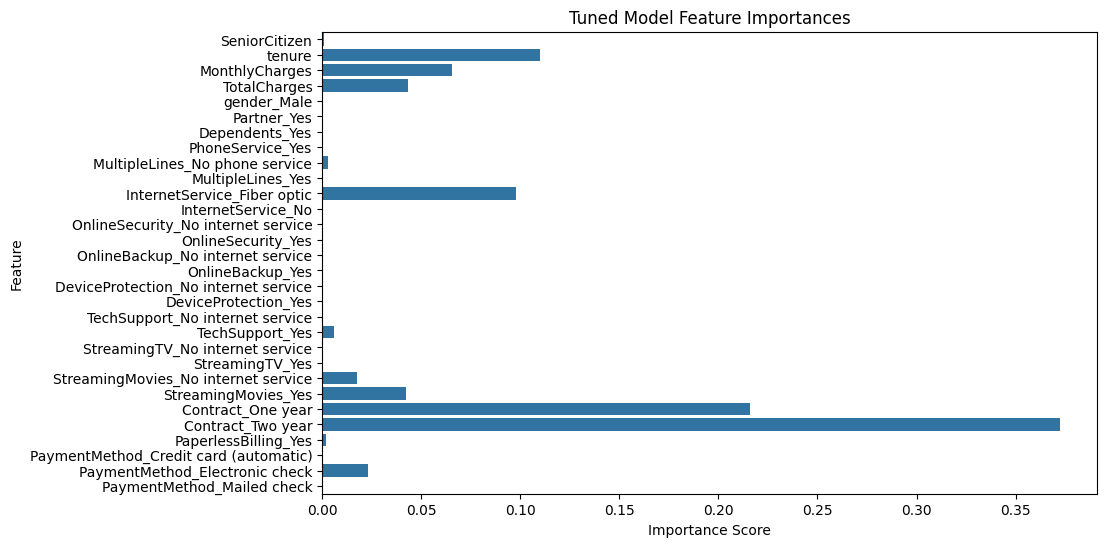

In [16]:
# Import necessary tools
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying and plotting feature importances for the tuned model
importance = tuned_clf.feature_importances_
for feature, score in zip(X.columns, importance):
  print(f"Feature: {feature}, Importance: {score:.4f}")

plt.figure(figsize = (10, 6))
sns.barplot(x = importance, y = X.columns)
plt.title("Tuned Model Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

This plot illustrates the importance of understanding and visualizing feature importances. We can see here that the type of `Contract` is a significant factor (customers on longer contracts churn less), `tenure` is important, whether the customer has fiber optic internet (perhaps customers churn more due to hiiigher costs or better competition) also important.

Now that we know which features make the most impact on predicting customer churn, we should look into what they mean.

Before we get into that, let's take a look at the CART (decision tree) model itself.


### *4.2 Visualizing the Tree*

- sklearn
- dtreeviz
- export_text

**The Importance of Visualization and Readability:**
- **Why Visualize?**

  Visualization is a critical part of data analysis because it transforms complex models into intuitive, graphical representations. With decision trees, visualization makes the model’s logic explicit by displaying the decision rules as branches, making it easier for both data scientists and non-technical stakeholders to understand the decision-making process.

- **Readability of CART Decision Trees**

  Decision trees are inherently interpretable—each split represents a clear if-then rule. This transparency is a major reason why they are popular in fields like finance and marketing.


### *4.2.1 sklearn*
Let's try an initial visualization using scitkit-learn's `plot_tree()` function:

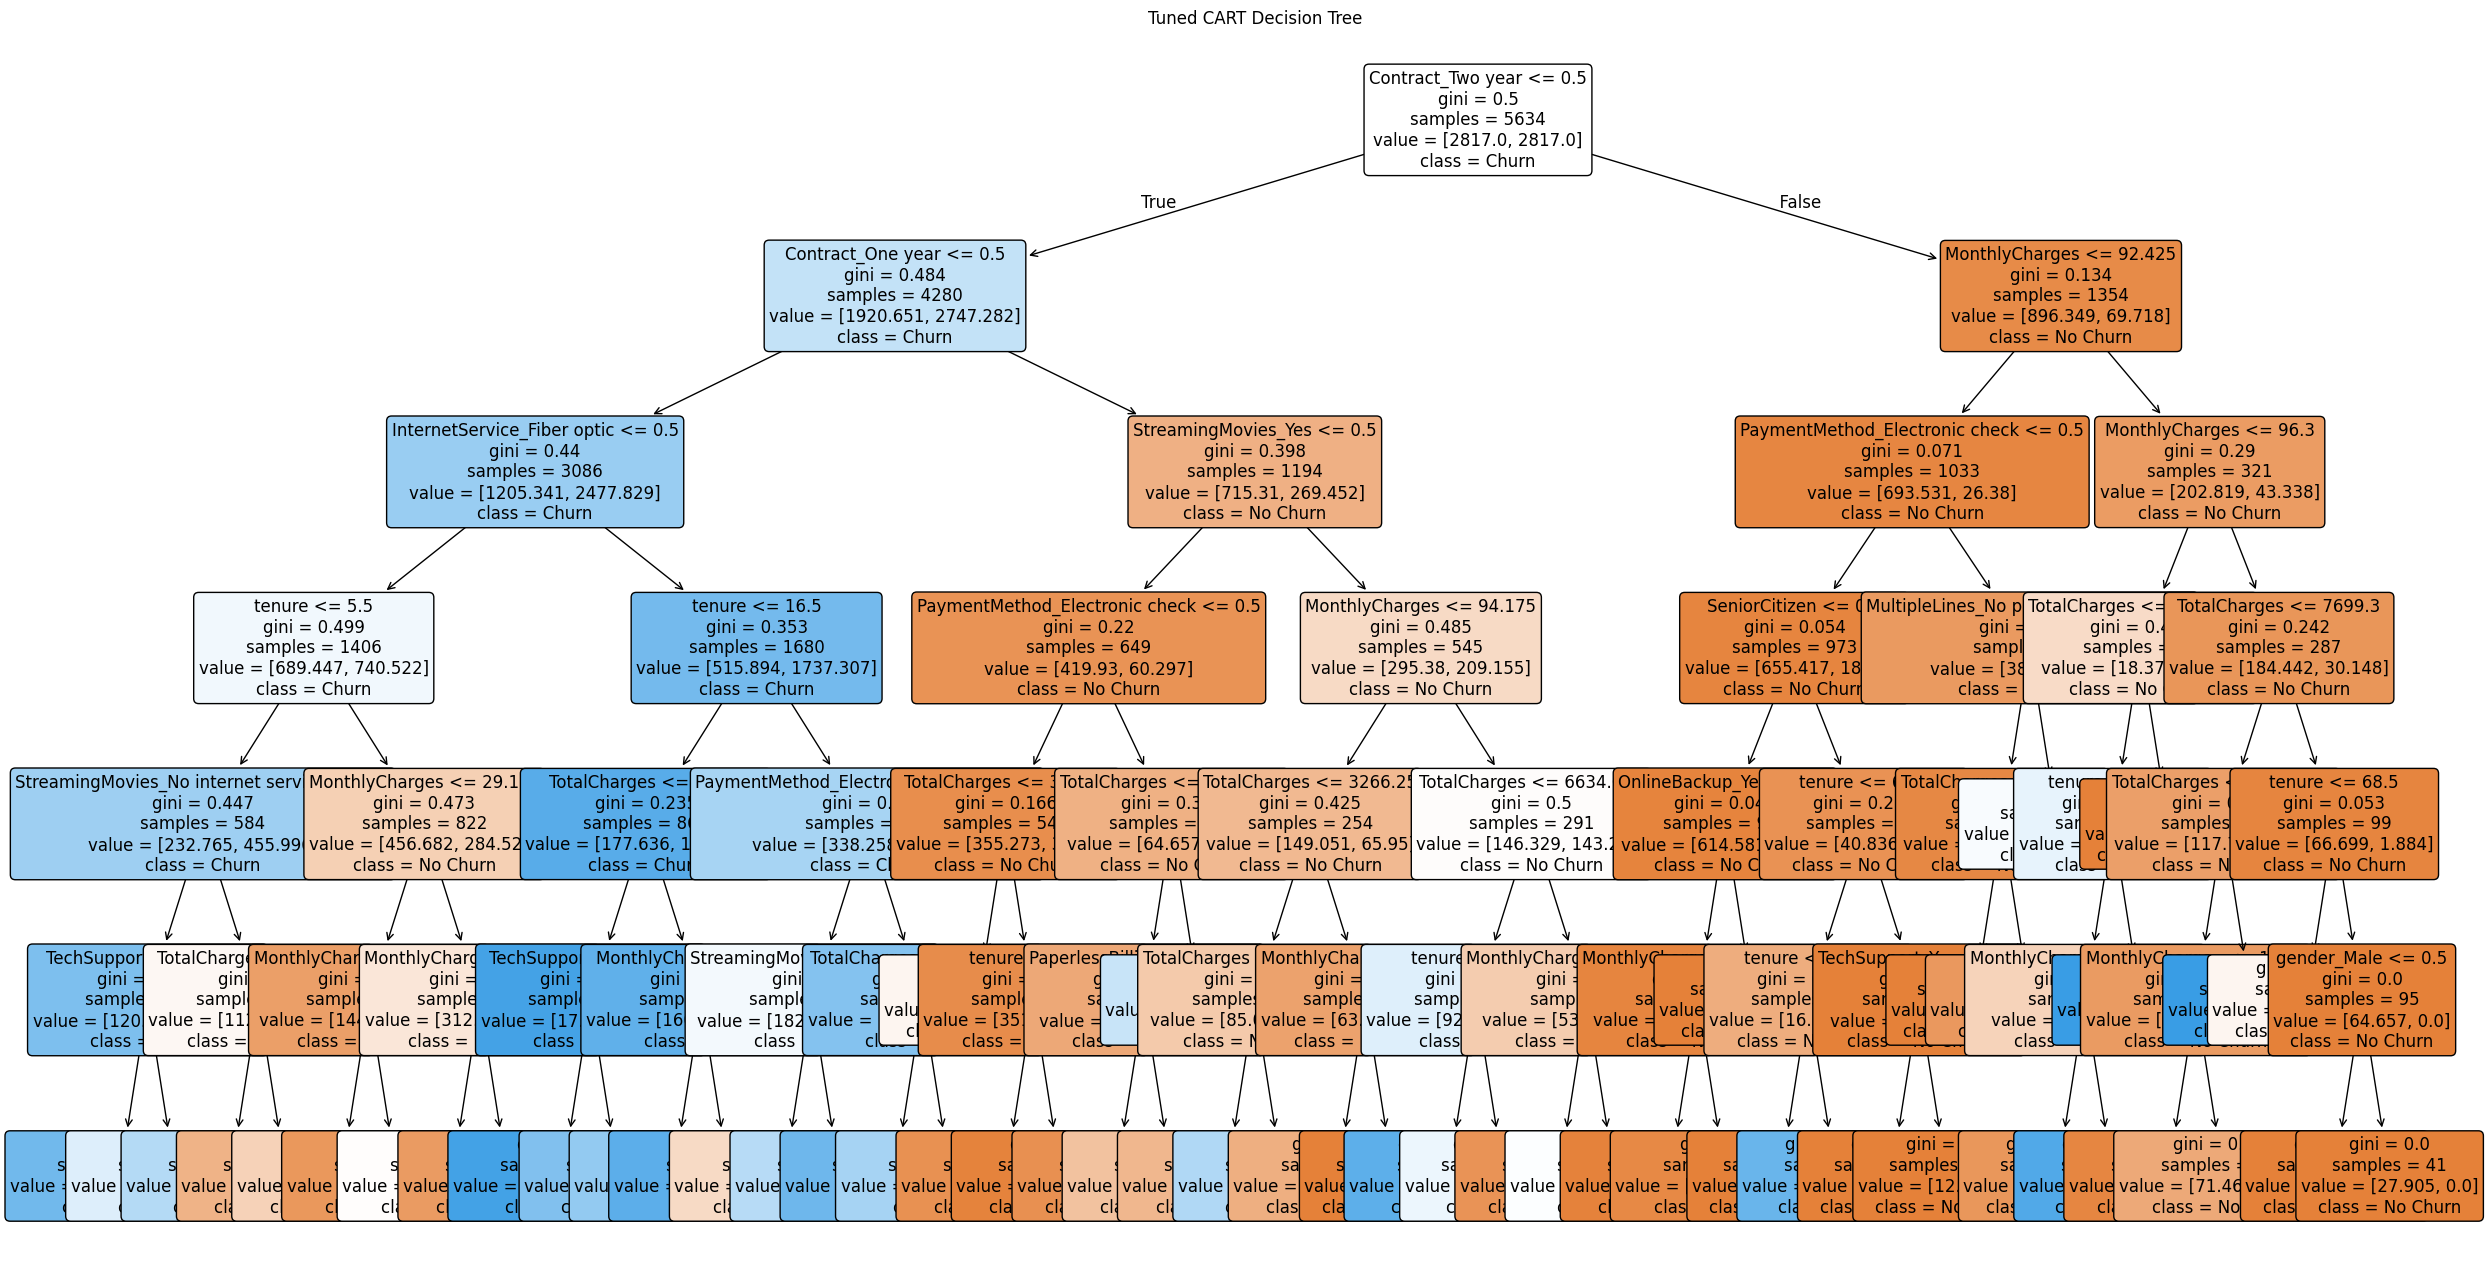

In [18]:
# import necessary tools
from sklearn.tree import plot_tree

# Visualizing the CART decision tree
plt.figure(figsize = (30,16))
plot_tree(tuned_clf, feature_names = X.columns,
          class_names = ["No Churn", "Churn"],
          filled = True, rounded = True, fontsize = 12)
plt.title("Tuned CART Decision Tree")
plt.show()

While this tree gives us all the information we need about how the nodes are splitting and which features are being used, they can be dense and hard to read. Especially when we have `max_depth = 6` Inline code.


### *4.2.2 dtreeviz*

One way to address this readability issue is to use `dtreeviz`. This tool generates interactive, high-resolution visualizations with enhanced clarity:

- It displays detailed node information, such as the distribution of class probabilities, number of samples, and impurity.
- It uses intuitive graphical elements (like pie charts and color gradients) to represent splits and node statistics.
- `dtreeviz` was developed to make decision tree outputs more accessible and interpretable—it has been used in both academic and industry settings to effectively communicate model decisions.

For `dtreeviz` version 2.0 and later, the syntax is:

In [19]:
!pip install --upgrade dtreeviz
import logging
import warnings
import dtreeviz

warnings.filterwarnings("ignore", message=".*X does not have valid feature names.*")
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
logging.getLogger('matplotlib.axes._base').setLevel(logging.ERROR)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


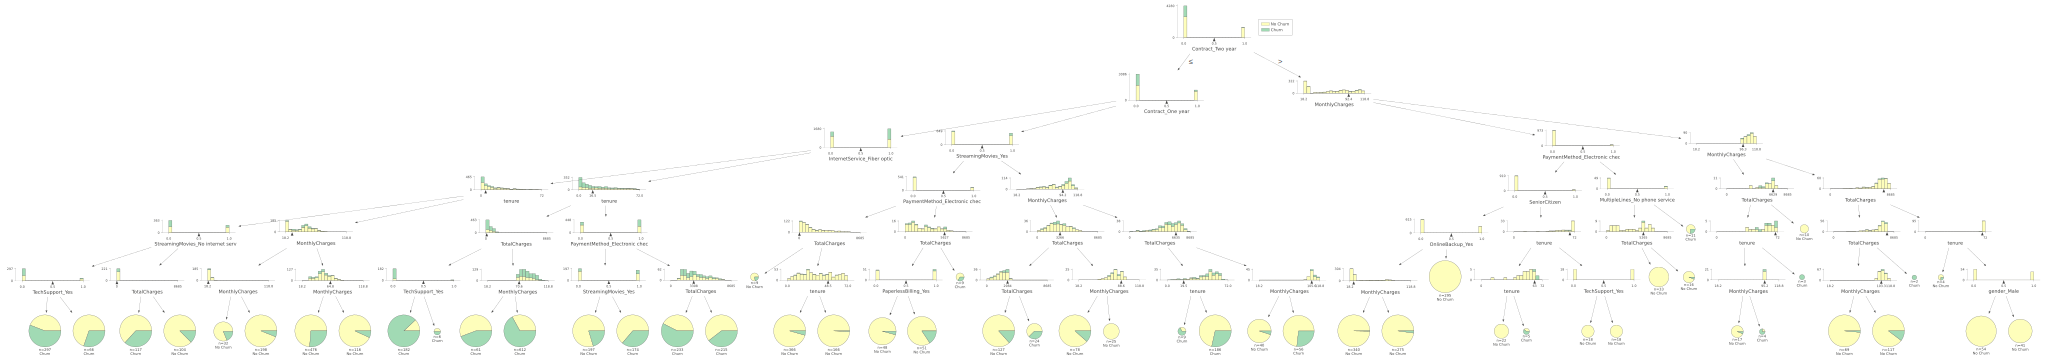

In [20]:
#Make sure that all missing values have been replaced with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Now create the visualization using the new API:
m = dtreeviz.model(tuned_clf, X_train, y_train,
                   feature_names = X.columns,
                   class_names = ["No Churn", "Churn"])
m.view()

**Starting from the top:**
- We have the root node which asks the big question using the most important feature identified by the model, `Contract_Two year`:
  - If we take a look at the root node, it's labeled `Contract_Two year`, this is the feature the model asks the question with.
  - The black triangle (labeled 0.5) represents the queston being asked ("Does the customer have a two year contract?). If the customer does not have a two year contract they would be labeled '0', which means 'No' (since 0 is less than 0.5, data goes left). Likewise, if customer has a two year contract, they would be labeled '1', which means yes (1 is greater than 0, so data goes right).
  - This logic applies to every split until the leaf node.
- The pie charts at the leaf nodes indicate the proportion of classes in the predictions ("Churn" vs. "No Churn"). Higher proportions of the "Churn" class highlight opportunities to target these segments of customers with retention campaigns.
- The closer the features are to the top of the tree, the more impactful they are to predictions.

Learn more about [dtreeviz here](https://www.tensorflow.org/decision_forests/tutorials/dtreeviz_colab)

### *4.2.3 export_text*

Scikit-learn also allows us to just print the questions asked by the CART model at each node.

In [23]:
# import necessary tools
from sklearn.tree import export_text

# Using export_text to extract the questions asked at each node
tree_rules = export_text(tuned_clf, feature_names = X.columns)
print("Decision Tree Rules:", tree_rules)

Decision Tree Rules: |--- Contract_Two year <= 0.50
|   |--- Contract_One year <= 0.50
|   |   |--- InternetService_Fiber optic <= 0.50
|   |   |   |--- tenure <= 5.50
|   |   |   |   |--- StreamingMovies_No internet service <= 0.50
|   |   |   |   |   |--- TechSupport_Yes <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- TechSupport_Yes >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- StreamingMovies_No internet service >  0.50
|   |   |   |   |   |--- TotalCharges <= 20.93
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- TotalCharges >  20.93
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- tenure >  5.50
|   |   |   |   |--- MonthlyCharges <= 29.18
|   |   |   |   |   |--- MonthlyCharges <= 19.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MonthlyCharges >  19.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- MonthlyCharges >  29.18
|   |   |   |   |   |--- MonthlyCharges <= 64.78
|   |   |   |

They can be interpreted the same way as the graphs above. We have at the very top the first 'question', `Contract_Two year <= 0.50`. If the answer is 'yes' (they are not on a two-year contract, i.e. value 0), the tree goes to the left, which then checks if they are on a one-year contract, etc. Essentially, if a customer is on a month-to-month contract (both two-year and one-year flags are 0), the tree goes deeper into checking tenure and charges to predict churn. If they are on a long-term contract, the tree likely goes another way (probably predicting no churn or checking other factors).

This aligns with marketing intuition: customers on month-to-month plans are more at risk of churn (because they have easy opportunities to leave each month). Those locked in a contract churn less (at least until their contract ends).

---

## ***Step 5: Results and Marketing Insights***

Now, let’s step back for a second—what does all this mean for you as a marketer? The CART model we've built isn’t just numbers and technical jargon; it’s actually a crystal ball that helps us predict who might leave us, and why. Here are some practical takeaways:

- **Contract Type is Key:** Customers on month-to-month contracts (versus one-year or two-year contracts) are the most likely to leave. This makes sense, no long-term commitment makes switching easier.
  - **Marketing Action:** Focus retention efforts on month-to-month customers. Nudge these customers toward longer-term plans with discounts or special perks. Making it attractive to commit will reduce churn.

- **Tenure (Time with Company):** Newer customers need extra love. Those in their first few months are still deciding if the service is right for them.
  - **Marketing Action:** A warm welcome goes a long way. Think personalized onboarding emails, friendly check-in caclls, or special promotions for the first few months. Make the first impression count.

- **Monthly Charges:** Customers paying high monthly charges could be price-sensitive, making them more likely to jump ship.
  - **Marketing Action:** Show these customers exactly what they're getting for their money. Offer loyalty discounts or clearly highlight premium features that justify the price.

- **Services and Support (Matters more than You Think):** Our model reveals that customers without tech support are at higher risk of leaving—likely because when problems occur, they're left frustrated and unsupported.
  - **Marketing Action:** Market the value of tech support or include a basic support service in standard plans to reduce frustration. If fiber optic users churn more, investigate if it’s due to service issues or competition, and address that with network improvements or competitive pricing.

- **Not all Customers Churn Equally:** Recognize that the most important features don't tell the full story. Sometimes family status, having a partner, or even payment methods can influence churn rates. For example, electronic-check customers might be more likely to leave due to hassles in payment.
  - **Marketing Action:** If possible target these specific groups with customized communication. Maybe older customers using electronic checks need simpler payment options or clear instructions to lubricate the friction.


**Let’s get even more specific:**

Our tree reveals that customers with “Month-to-month” contracts with no tech support is a particularly lethal combination for churn. A "high-risk" combination. We can double-check this insight by turning to out original dataset.

In [24]:
# Analyze churn rate for specific segment: month-to-month & no tech support
segment = data[(data['Contract']=='Month-to-month') & (data['TechSupport']=='No')]
print("Churn rate for Month-to-Month + No Tech Support customers:",
      (segment['Churn']=='Yes').mean())


Churn rate for Month-to-Month + No Tech Support customers: 0.503731343283582


This churn rate is 50.4%, that’s much higher than the average 26%. One out of every two customer with these features leave. That's a major insight. This segment of customers need immediate attention!

**Communicating to Stakeholders:

When you present these insights to your steam, stakeholders, or executives, keep it straightforward. For instance, you might say:

- *“Our model can predict churn with about 71.2% accuracy and 76.7% recall. It identifies roughly 3 out of 4 would-be churners, giving us a chance to intervene early”*

- *“The biggest reasons people leave are eeasy-to-exit contracts; being new customers (who are not fully convinced yet), and not having tech support.”*

- *“Our best move would be to target retention campaigns—increasing the attractiveness of switching to annual contracts or including free support for customers.”*

---

## ***Step 6: Conclusion and Next Steps***

Congratulations on completing the churn prediction activity! You’ve not only built a predictive model, but also interpreted it in a marketing context. Let's quickly recap what you've accomplished:

1. **Getting to Know Your Data:** You've checked your data, cleaned it, and made sure it's ready for analysis. This step sets the foundation for everything that follows.
2. **Model Training and Tuning:** You started with a simple CART (decision tree), then fine-tuned it to make good decisions.
3. **Evaluating the Model:** You learned how accuracy isn't everything. Metrics like recall and precision tell you if the model really helps you predict churn rate.
4. **Turning Numbers Into Action:** And the most crucial step—figuring out what the data means and how we can take advantage in a marketing context.

Remember, these real value here lies in not just building models, but translating these insights into smart marketing decisions. Knowing **why** customers churn helps you craft better experiences, keep your customers happy, and as a consequence, increase shareholder value.

**Next Steps:**

- **Try advanced models:** Decision trees are great for clarity, but if you’re looking for even more accurate predictions, you can explore advanced models like Random Forests or Gradient Boosting. They might be more accurate but slightly harder to interpret. However, tools like SHAP values help explain these complex models clearly.

- **Think about value, not just churn:**
 Not all customers are created equal—some bring more revenue than others. If you have customer value data, why not tweak the model to prioritize keeping your most valuable customers? It’s like focusing extra attention on your VIPs.

- **Put the model into action:** In the real world, you'd automate this model to regularly check your customer base and identify who’s likely to churn in advance. Imagine a system that flags at-risk customers each month, allowing your marketing team to step in before it's too late.
- **Keep your model fresh:** Customer preferences evolve, and new competitors emerge. It’s important to regularly retrain and update your model so it stays relevant. Think of it like regularly updating your apps or refreshing your playlists.

By incorporating these improvements and considerations, this activity has hopefully become a comprehensive learning resource. You’ve seen not just the how of building a churn model, but also the why at each step, all grounded in real-world marketing relevance. Keep exploring and happy analyzing!